In [22]:
## Enable matplotlib inline
%matplotlib inline

## Imports
import pandas as pd
pd.set_option('display.mpl_style', 'default') 
pd.set_option('display.width', 5000) 
pd.set_option('display.max_columns', 60) 

import numpy as np

line_width has been deprecated, use display.width instead (currently both are
identical)



In [23]:
## Read the training data
train_dataset = pd.read_csv('train.csv')

In [24]:
train_dataset

,Id,minutes_past,radardist_km,Ref,Ref_5x5_10th,Ref_5x5_50th,Ref_5x5_90th,RefComposite,RefComposite_5x5_10th,RefComposite_5x5_50th,RefComposite_5x5_90th,RhoHV,RhoHV_5x5_10th,RhoHV_5x5_50th,RhoHV_5x5_90th,Zdr,Zdr_5x5_10th,Zdr_5x5_50th,Zdr_5x5_90th,Kdp,Kdp_5x5_10th,Kdp_5x5_50th,Kdp_5x5_90th,Expected
0,1,3,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254000
1,1,16,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254000
2,1,25,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254000
3,1,35,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254000
4,1,45,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254000
5,1,55,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254000
6,2,1,2,9.0,5.0,7.5,10.5,15.0,10.5,16.5,23.5,0.998333,0.998333,0.998333,0.998333,0.3750,-0.1250,0.3125,0.8750,1.059998,-1.410004,-0.350006,1.059998,1.016000
7,2,6,2,26.5,22.5,25.5,31.5,26.5,26.5,28.5,32.0,1.001667,0.981667,0.998333,1.005000,0.0625,-0.1875,0.2500,0.6875,NaN,NaN,NaN,1.409988,1.016000
8,2,11,2,21.5,15.5,20.5,25.0,26.5,23.5,25.0,27.0,1.001667,0.995000,0.998333,1.001667,0.3125,-0.0625,0.3125,0.6250,0.349991,NaN,-0.350006,1.759994,1.016000
9,2,16,2,18.0,14.0,17.5,21.0,20.5,18.0,20.5,23.0,0.995000,0.995000,0.998333,1.001667,0.2500,0.1250,0.3750,0.6875,0.349991,-1.059998,0.000000,1.059998,1.016000


In [25]:
## Display all data for a single ID
train_dataset[6:18]

,Id,minutes_past,radardist_km,Ref,Ref_5x5_10th,Ref_5x5_50th,Ref_5x5_90th,RefComposite,RefComposite_5x5_10th,RefComposite_5x5_50th,RefComposite_5x5_90th,RhoHV,RhoHV_5x5_10th,RhoHV_5x5_50th,RhoHV_5x5_90th,Zdr,Zdr_5x5_10th,Zdr_5x5_50th,Zdr_5x5_90th,Kdp,Kdp_5x5_10th,Kdp_5x5_50th,Kdp_5x5_90th,Expected
6,2,1,2,9.0,5.0,7.5,10.5,15.0,10.5,16.5,23.5,0.998333,0.998333,0.998333,0.998333,0.3750,-0.1250,0.3125,0.8750,1.059998,-1.410004,-0.350006,1.059998,1.016
7,2,6,2,26.5,22.5,25.5,31.5,26.5,26.5,28.5,32.0,1.001667,0.981667,0.998333,1.005000,0.0625,-0.1875,0.2500,0.6875,NaN,NaN,NaN,1.409988,1.016
8,2,11,2,21.5,15.5,20.5,25.0,26.5,23.5,25.0,27.0,1.001667,0.995000,0.998333,1.001667,0.3125,-0.0625,0.3125,0.6250,0.349991,NaN,-0.350006,1.759994,1.016
9,2,16,2,18.0,14.0,17.5,21.0,20.5,18.0,20.5,23.0,0.995000,0.995000,0.998333,1.001667,0.2500,0.1250,0.3750,0.6875,0.349991,-1.059998,0.000000,1.059998,1.016
10,2,21,2,24.5,16.5,21.0,24.5,24.5,21.0,24.0,28.0,0.998333,0.995000,0.998333,0.998333,0.2500,0.0625,0.1875,0.5625,-0.350006,-1.059998,-0.350006,1.759994,1.016
11,2,26,2,12.0,12.0,16.0,20.0,16.5,17.0,19.0,21.0,0.998333,0.995000,0.998333,0.998333,0.5625,0.2500,0.4375,0.6875,-1.760010,-1.760010,-0.350006,0.709991,1.016
12,2,31,2,22.5,19.0,22.0,25.0,26.0,23.5,25.5,27.5,0.998333,0.995000,0.998333,1.001667,0.0000,-0.1875,0.2500,0.6250,-1.059998,-2.120010,-0.710007,0.349991,1.016
13,2,37,2,14.0,14.0,18.5,21.0,19.5,20.0,21.0,23.0,0.998333,0.991667,0.998333,0.998333,0.5000,0.1875,0.4375,0.8125,0.000000,-1.760010,-0.350006,1.059998,1.016
14,2,42,2,12.0,11.0,12.5,17.0,19.5,18.0,21.0,23.0,0.998333,0.995000,0.998333,0.998333,0.6250,0.3750,0.6250,0.8750,-0.350006,-0.350006,0.000000,0.349991,1.016
15,2,47,2,1.5,3.5,7.0,10.5,18.0,16.5,18.5,21.5,0.998333,0.995000,0.998333,0.998333,0.3750,0.1875,0.5000,0.6875,0.349991,-2.110001,-0.350006,1.059998,1.016


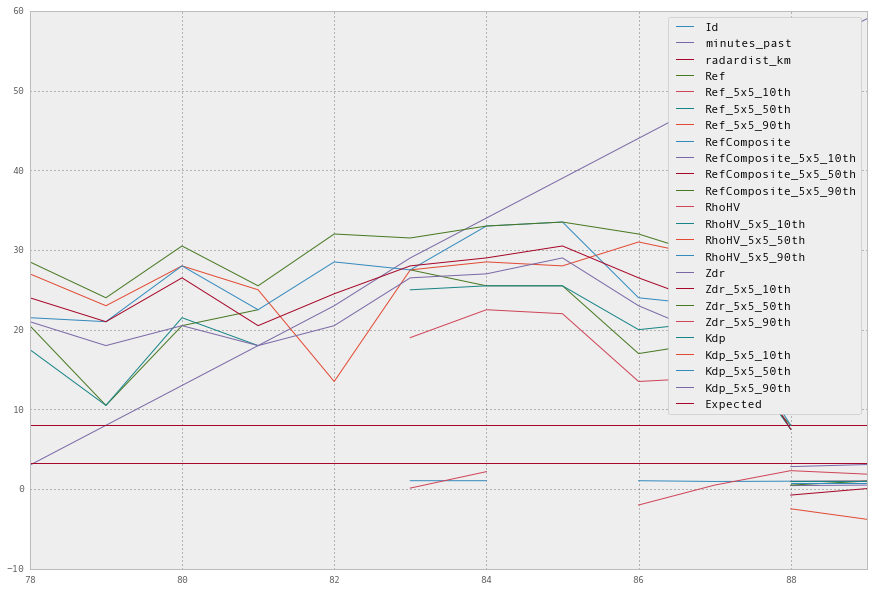

In [47]:
train_dataset[train_dataset['Id'] == 8].plot(figsize=(15, 10))

In [42]:
## Select rows for a particular ID
train_ref_no_nan = train_dataset[~train_dataset['Ref'].isnull()]
train_ref_no_nan

,Id,minutes_past,radardist_km,Ref,Ref_5x5_10th,Ref_5x5_50th,Ref_5x5_90th,RefComposite,RefComposite_5x5_10th,RefComposite_5x5_50th,RefComposite_5x5_90th,RhoHV,RhoHV_5x5_10th,RhoHV_5x5_50th,RhoHV_5x5_90th,Zdr,Zdr_5x5_10th,Zdr_5x5_50th,Zdr_5x5_90th,Kdp,Kdp_5x5_10th,Kdp_5x5_50th,Kdp_5x5_90th,Expected
6,2,1,2,9.0,5.0,7.5,10.5,15.0,10.5,16.5,23.5,0.998333,0.998333,0.998333,0.998333,0.3750,-0.1250,0.3125,0.8750,1.059998,-1.410004,-0.350006,1.059998,1.016000
7,2,6,2,26.5,22.5,25.5,31.5,26.5,26.5,28.5,32.0,1.001667,0.981667,0.998333,1.005000,0.0625,-0.1875,0.2500,0.6875,NaN,NaN,NaN,1.409988,1.016000
8,2,11,2,21.5,15.5,20.5,25.0,26.5,23.5,25.0,27.0,1.001667,0.995000,0.998333,1.001667,0.3125,-0.0625,0.3125,0.6250,0.349991,NaN,-0.350006,1.759994,1.016000
9,2,16,2,18.0,14.0,17.5,21.0,20.5,18.0,20.5,23.0,0.995000,0.995000,0.998333,1.001667,0.2500,0.1250,0.3750,0.6875,0.349991,-1.059998,0.000000,1.059998,1.016000
10,2,21,2,24.5,16.5,21.0,24.5,24.5,21.0,24.0,28.0,0.998333,0.995000,0.998333,0.998333,0.2500,0.0625,0.1875,0.5625,-0.350006,-1.059998,-0.350006,1.759994,1.016000
11,2,26,2,12.0,12.0,16.0,20.0,16.5,17.0,19.0,21.0,0.998333,0.995000,0.998333,0.998333,0.5625,0.2500,0.4375,0.6875,-1.760010,-1.760010,-0.350006,0.709991,1.016000
12,2,31,2,22.5,19.0,22.0,25.0,26.0,23.5,25.5,27.5,0.998333,0.995000,0.998333,1.001667,0.0000,-0.1875,0.2500,0.6250,-1.059998,-2.120010,-0.710007,0.349991,1.016000
13,2,37,2,14.0,14.0,18.5,21.0,19.5,20.0,21.0,23.0,0.998333,0.991667,0.998333,0.998333,0.5000,0.1875,0.4375,0.8125,0.000000,-1.760010,-0.350006,1.059998,1.016000
14,2,42,2,12.0,11.0,12.5,17.0,19.5,18.0,21.0,23.0,0.998333,0.995000,0.998333,0.998333,0.6250,0.3750,0.6250,0.8750,-0.350006,-0.350006,0.000000,0.349991,1.016000
15,2,47,2,1.5,3.5,7.0,10.5,18.0,16.5,18.5,21.5,0.998333,0.995000,0.998333,0.998333,0.3750,0.1875,0.5000,0.6875,0.349991,-2.110001,-0.350006,1.059998,1.016000


In [70]:
## Try to single out the last row for each separate ID
map_numeric_to_boolean = {0:False, 1:True}

## Create a selector, which takes the difference between the next and current index, shifts it backward and
## transform the 0 and 1 values to boolean. The final NaN value is of course the last of its time series too,
## so replace by True
select_last_id = train_dataset['Id'].diff().shift(-1).map(map_numeric_to_boolean).fillna(True)

In [84]:
## Do the selection
last_id = train_dataset[select_last_id]

## Remove rows where Ref is NaN
clean_last_id = last_id[~last_id['Ref'].isnull()]

## Remove rows where Expected is > 1000
clean_last_id = clean_last_id[clean_last_id['Expected'] < 1000.0]

In [85]:
len(clean_last_id)

476954

In [86]:
clean_last_id

,Id,minutes_past,radardist_km,Ref,Ref_5x5_10th,Ref_5x5_50th,Ref_5x5_90th,RefComposite,RefComposite_5x5_10th,RefComposite_5x5_50th,RefComposite_5x5_90th,RhoHV,RhoHV_5x5_10th,RhoHV_5x5_50th,RhoHV_5x5_90th,Zdr,Zdr_5x5_10th,Zdr_5x5_50th,Zdr_5x5_90th,Kdp,Kdp_5x5_10th,Kdp_5x5_50th,Kdp_5x5_90th,Expected
17,2,58,2,22.0,16.5,22.5,26.5,31.5,26.5,29.0,32.0,0.998333,0.995000,0.998333,1.001667,0.3750,0.1875,0.3750,0.8750,-1.410004,NaN,-0.350006,0.699997,1.016000
42,4,56,9,20.0,8.5,16.5,20.0,20.0,10.0,17.5,20.0,0.988333,NaN,0.988333,1.051667,-1.1250,NaN,0.5000,3.5000,7.029999,NaN,0.000000,7.029999,4.064002
114,10,53,10,32.0,30.0,34.0,36.5,33.0,32.5,34.0,37.5,0.901667,0.838333,0.948333,0.995000,1.1875,-0.6875,0.5625,2.0000,-3.870010,-3.870010,1.409988,7.459991,0.010000
121,11,58,12,15.0,15.0,18.5,22.5,15.0,15.0,18.5,22.5,1.011667,0.968333,0.995000,1.008333,1.0625,-0.4375,0.1875,1.0625,-0.710007,-3.169998,-0.350006,1.759994,2.540001
131,12,56,6,35.5,34.5,36.5,39.5,40.5,39.0,41.5,45.0,0.995000,0.978333,0.995000,0.998333,1.0625,0.5625,0.8750,1.3125,1.739990,-0.710007,0.699997,3.879990,3.302002
168,15,59,14,15.0,NaN,18.0,22.5,21.5,13.5,18.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.286001
191,17,53,14,16.5,15.0,18.0,25.5,16.5,15.5,18.0,25.5,1.025000,0.991667,1.008333,1.051667,-0.2500,-0.8750,-0.2500,1.9375,-2.470001,-2.470001,2.809998,7.959991,0.060000
264,24,56,11,26.0,25.0,29.5,36.0,37.0,33.5,36.0,38.0,0.928333,0.928333,0.965000,0.988333,-1.1250,-0.8750,0.0000,1.2500,3.169998,-5.430008,0.709991,5.239990,1.075001
311,29,55,3,24.0,19.5,25.5,32.5,24.0,21.0,26.0,33.5,0.938333,NaN,0.708333,1.051667,1.2500,NaN,2.8125,7.6875,NaN,NaN,NaN,NaN,1.524001
340,32,53,14,19.5,13.0,17.0,21.5,19.5,15.5,18.0,21.5,1.015000,NaN,1.051667,1.051667,-1.2500,NaN,0.0625,1.9375,5.279999,NaN,0.970001,12.909988,3.556002


In [87]:
clean_last_id[['Id', 'minutes_past', 'radardist_km', 'Ref', 'RefComposite', 'Expected']]

,Id,minutes_past,radardist_km,Ref,RefComposite,Expected
17,2,58,2,22.0,31.5,1.016000
42,4,56,9,20.0,20.0,4.064002
114,10,53,10,32.0,33.0,0.010000
121,11,58,12,15.0,15.0,2.540001
131,12,56,6,35.5,40.5,3.302002
168,15,59,14,15.0,21.5,2.286001
191,17,53,14,16.5,16.5,0.060000
264,24,56,11,26.0,37.0,1.075001
311,29,55,3,24.0,24.0,1.524001
340,32,53,14,19.5,19.5,3.556002


In [128]:
## Import scikit-learn stuff
from sklearn import ensemble

In [129]:
data   = clean_last_id[['minutes_past', 'radardist_km', 'Ref', 'RefComposite']].values
target = clean_last_id['Expected'].values

In [130]:
regressor = ensemble.GradientBoostingRegressor()
regressor.fit(data, target)

GradientBoostingRegressor(alpha=0.9, init=None, learning_rate=0.1, loss='ls',
             max_depth=3, max_features=None, max_leaf_nodes=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=100,
             random_state=None, subsample=1.0, verbose=0, warm_start=False)

In [131]:
## obtain testing dataset
testing_dataset = pd.read_csv('test.csv')

In [132]:
test_data = testing_dataset[['Id', 'minutes_past', 'radardist_km', 'Ref', 'RefComposite']].fillna(0)

In [134]:
def predict(minutes_past, radardist_km, Ref, RefComposite):
    return regressor.predict([minutes_past, radardist_km, Ref, RefComposite])[0]

In [144]:
test_data['Expected'] = map(predict, test_data['minutes_past'], test_data['radardist_km'], test_data['Ref'], test_data['RefComposite'])

In [145]:
select_last_id = test_data['Id'].diff().shift(-1).map(map_numeric_to_boolean).fillna(True)

In [146]:
test_data_unique_id = test_data[select_last_id]

In [147]:
test_data_unique_id[['Id', 'Expected']].to_csv('predictions.csv', index=False)